In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mca import MCA

In [2]:
data = pd.read_csv('Insurance.csv', sep=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39387 entries, 0 to 39386
Data columns (total 37 columns):
Numpol               39387 non-null object
Date_Debut           39387 non-null object
Date_fin             39387 non-null object
AFN_Date             39387 non-null object
AFN_Annee            39387 non-null int64
Fract                39387 non-null object
Date_NE              39386 non-null object
Permis_Cat           39387 non-null object
Permis_Date          39386 non-null object
VEH                  39387 non-null object
VEH_Cyl              39387 non-null int64
VEH_Marque           39387 non-null object
VEH_Modele           39386 non-null object
VEH_cat              39387 non-null object
VEH_immat            39385 non-null object
VEH_1_MEC_Date       39386 non-null object
VEH_GPE              39384 non-null float64
VEH_Classe           39384 non-null object
Bonus_Moto           39385 non-null float64
Bonus_Auto           39384 non-null float64
CRM                  39387 non

In [4]:
data.describe()

,AFN_Annee,VEH_Cyl,VEH_GPE,Bonus_Moto,Bonus_Auto,CRM,Garantie,Sin_moto_resp,Sin_moto_non_resp,Sin_moto_vol,Sin_auto_resp,Sin_auto_non_resp,Ass_CP,Anc_Permis,Anc_MEC,Depart,Age,Sinistralite,Sinistre_freq
count,39387.000000,39387.000000,39384.000000,39385.000000,39384.000000,39387.000000,39387.000000,39384.000000,39382.000000,39384.000000,39381.000000,39381.000000,39387.000000,39387.000000,39387.000000,39386.000000,39387.000000,39387.000000,39387.000000
mean,2012.762130,847.160357,4.045399,65.623842,66.064772,61.710336,3.481276,0.021328,0.055736,0.022700,0.048221,0.114446,57257.638079,14.834184,2.372940,56.951226,41.606342,0.132353,0.276462
std,1.272045,493.148249,1.880146,19.751898,19.567837,17.040639,0.972596,0.144830,0.244731,0.152983,0.214710,0.364261,29991.690718,12.314000,4.521076,29.982214,11.469123,0.338879,0.858119
min,2011.000000,50.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,402.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000
25%,2012.000000,500.000000,3.000000,50.000000,50.000000,50.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31290.000000,3.000000,0.000000,31.000000,32.000000,0.000000,0.000000
50%,2013.000000,800.000000,4.000000,51.000000,54.000000,50.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65200.000000,13.000000,0.000000,65.000000,42.000000,0.000000,0.000000
75%,2014.000000,1200.000000,5.000000,85.000000,85.000000,72.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83110.000000,24.000000,3.000000,83.000000,50.000000,0.000000,0.000000
max,2015.000000,2300.000000,22.000000,140.000000,125.000000,118.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,98000.000000,112.000000,115.000000,98.000000,113.000000,1.000000,18.000000


In [5]:
data.columns

Index(['Numpol', 'Date_Debut', 'Date_fin', 'AFN_Date', 'AFN_Annee', 'Fract',
       'Date_NE', 'Permis_Cat', 'Permis_Date', 'VEH', 'VEH_Cyl', 'VEH_Marque',
       'VEH_Modele', 'VEH_cat', 'VEH_immat', 'VEH_1_MEC_Date', 'VEH_GPE',
       'VEH_Classe', 'Bonus_Moto', 'Bonus_Auto', 'CRM', 'Garantie', 'Formule',
       'Sin_moto_resp', 'Sin_moto_non_resp', 'Sin_moto_vol', 'Sin_auto_resp',
       'Sin_auto_non_resp', 'Ass_CP', 'Statut_commune', 'Anc_Permis ',
       'Anc_MEC', 'Depart', 'Age', 'Sinistralite', 'Sinistre_freq',
       'Sinistre_Freq'],
      dtype='object')

In [6]:
df = data[['Age','Bonus_Moto','VEH_Cyl','Anc_MEC','Anc_Permis ','VEH_cat']]

In [7]:
df.head()

,Age,Bonus_Moto,VEH_Cyl,Anc_MEC,Anc_Permis,VEH_cat
0,15,NaN,50,1,1,SCOOTER
1,27,NaN,50,11,112,SCOOTER
2,52,50.0,1584,0,31,GRAND TOURISME
3,27,72.0,600,2,2,ROADSTER
4,73,50.0,250,1,51,SCOOTER


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39387 entries, 0 to 39386
Data columns (total 6 columns):
Age            39387 non-null int64
Bonus_Moto     39385 non-null float64
VEH_Cyl        39387 non-null int64
Anc_MEC        39387 non-null int64
Anc_Permis     39387 non-null int64
VEH_cat        39387 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ MB


In [9]:
df.dropna(subset=['Bonus_Moto'], axis=0, inplace=True)

/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39385 entries, 2 to 39386
Data columns (total 6 columns):
Age            39385 non-null int64
Bonus_Moto     39385 non-null float64
VEH_Cyl        39385 non-null int64
Anc_MEC        39385 non-null int64
Anc_Permis     39385 non-null int64
VEH_cat        39385 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 2.1+ MB


In [11]:
df.describe()

,Age,Bonus_Moto,VEH_Cyl,Anc_MEC,Anc_Permis
count,39385.000000,39385.000000,39385.000000,39385.000000,39385.000000
mean,41.607389,65.623842,847.200838,2.372756,14.832068
std,11.468394,19.751898,493.128050,4.520976,12.304378
min,16.000000,0.000000,70.000000,0.000000,0.000000
25%,32.000000,50.000000,500.000000,0.000000,3.000000
50%,42.000000,51.000000,800.000000,0.000000,13.000000
75%,50.000000,85.000000,1200.000000,3.000000,24.000000
max,113.000000,140.000000,2300.000000,115.000000,60.000000


In [12]:
# categorize age
def age(x):
    
    if x in range(14,30):
        x=1
    if x in range(30,40):
        x=2
    if x in range(40,50):
        x=3
    if x in range(50,60):
        x=4
    if x in range(60,81):
        x=5
    if x >= 81:
        x=6
    return x

# categorize Bonus 
def bonus(x):
    if x==50:
        x=1
    if x in range(51,87):
        x=2
    if x in range(87,101):
        x=3
    if x >=101:
        x=4
    return x

# categorize veh_cyl 
def veh_cyl(x):
    
    if x in range(70,662):
        x=1
    if x in range(662,1201):
        x=2
    if x in range(1201,2301):
        x=3
    return x

# categorize anc_mec 
def anc_mec(x):
    if x==0:
        x=1
    if x in range(1,6):
        x=2
    if x in range(6,11):
        x=3
    if x in range(11,16):
        x=4
    if x in range(16,21):
        x=5
    if x >=21:
        x=6
    return x

# categorize anc_permis
def anc_permis(x):
    if x==0:
        x=1
    if x in range(1,7):
        x=2
    if x in range(7,26):
        x=3
    if x in range(26,36):
        x=4
    if x in range(36,61):
        x=5
    return x
    

In [13]:
df['Age']=df['Age'].map(age)
df['Bonus_Moto']=df['Bonus_Moto'].map(bonus)
df['VEH_Cyl']=df['VEH_Cyl'].map(veh_cyl)
df['Anc_MEC']=df['Anc_MEC'].map(anc_mec)
df['Anc_Permis ']=df['Anc_Permis '].map(anc_permis)


/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [14]:
df.head()

,Age,Bonus_Moto,VEH_Cyl,Anc_MEC,Anc_Permis,VEH_cat
2,4,1.0,3,2,4,GRAND TOURISME
3,1,2.0,1,2,2,ROADSTER
4,5,1.0,1,2,5,SCOOTER
5,5,1.0,1,3,4,TRAIL
6,5,1.0,3,2,5,GRAND TOURISME


In [15]:
df.describe()

,Age,Bonus_Moto,VEH_Cyl,Anc_MEC,Anc_Permis
count,39385.000000,39385.000000,39385.000000,39385.000000,39385.000000
mean,2.723169,1.743836,1.781440,2.245169,2.939165
std,1.154268,0.808757,0.732446,0.684642,0.861502
min,1.000000,0.000000,1.000000,2.000000,2.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000
50%,3.000000,2.000000,2.000000,2.000000,3.000000
75%,4.000000,2.000000,2.000000,2.000000,3.000000
max,6.000000,4.000000,3.000000,6.000000,5.000000


In [16]:
# Redéfinir les types 
df["Age"]=pd.Categorical(df["Age"],ordered=False)
df["Bonus_Moto"]=pd.Categorical(df["Bonus_Moto"],ordered=False)
df["VEH_Cyl"]=pd.Categorical(df["VEH_Cyl"],ordered=False)
df["Anc_MEC"]=pd.Categorical(df["Anc_MEC"],ordered=False)
df["Anc_Permis "]=pd.Categorical(df["Anc_Permis "],ordered=False)

df.dtypes

/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Age            category
Bonus_Moto     category
VEH_Cyl        category
Anc_MEC        category
Anc_Permis     category
VEH_cat          object
dtype: object

In [17]:
dc=pd.DataFrame(pd.get_dummies(df))
dc.head()

,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Bonus_Moto_0.0,Bonus_Moto_1.0,Bonus_Moto_2.0,Bonus_Moto_3.0,...,VEH_cat_ENDURO,VEH_cat_GRAND TOURISME,VEH_cat_QUAD,VEH_cat_ROADSTER,VEH_cat_ROUTIERE BASIQUE,VEH_cat_ROUTIERE SPORTIVE,VEH_cat_SCOOTER,VEH_cat_SPORTIVE,VEH_cat_TRAIL,VEH_cat_TRIAL
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
df.columns

Index(['Age', 'Bonus_Moto', 'VEH_Cyl', 'Anc_MEC', 'Anc_Permis ', 'VEH_cat'], dtype='object')

In [19]:
'Age','Bonus_Moto','VEH_Cyl','Anc_MEC','Anc_Permis '

('Age', 'Bonus_Moto', 'VEH_Cyl', 'Anc_MEC', 'Anc_Permis ')

In [20]:
from sklearn.model_selection import train_test_split
X_sample, X_test=train_test_split(dc, test_size=0.8, random_state=26)

In [22]:
from mca import MCA
mcaFic=MCA(X_sample,benzecri=False)
# Valeurs singulières
print(mcaFic.L)

[0.41246672 0.28321916 0.25788679 0.22969131 0.22059244 0.1900405
 0.18779057 0.18370421 0.17424709 0.16972742 0.16892084 0.16697794
 0.16621228 0.16062664 0.15916393 0.15802934 0.15435858 0.14885205
 0.14364481 0.13607016 0.11325969 0.09541542 0.08516645 0.07521925
 0.05074257 0.04130718]


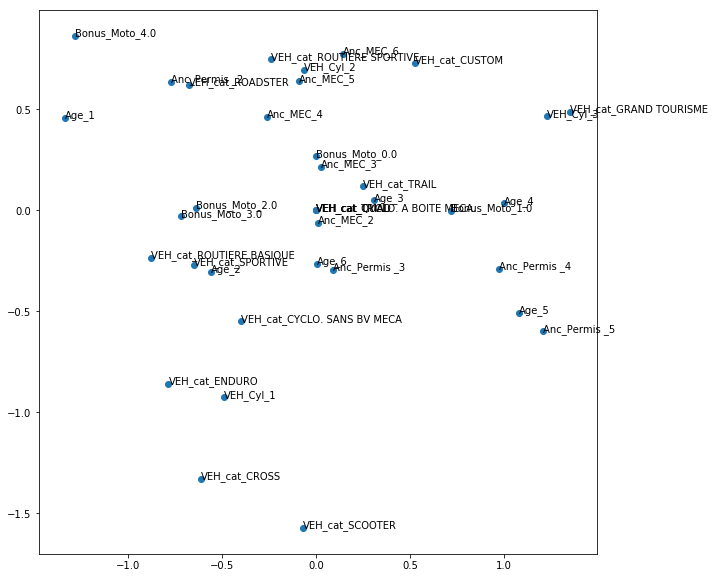

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1])
for i, j, nom in zip(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1], dc.columns):
       plt.text(i, j, nom)
plt.show()

In [25]:
mcaFic.inertia

4.3333333333331

In [27]:
mcaFic.expl_var()

array([0.17611966, 0.07780841, 0.06318172, 0.04869108, 0.04441713,
       0.03150228, 0.03063868, 0.02910091, 0.02569384, 0.02414045,
       0.02386832, 0.02321916, 0.02296579, 0.0211595 , 0.02069871,
       0.02034477, 0.0192206 , 0.01759414, 0.01612221, 0.01409586,
       0.00881533, 0.00554447, 0.00400716, 0.00275327, 0.00066675,
       0.00024175, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [29]:
mcaFic.L.shape

(26,)

In [31]:
mcaFic.fs_c().shape

(37, 21)

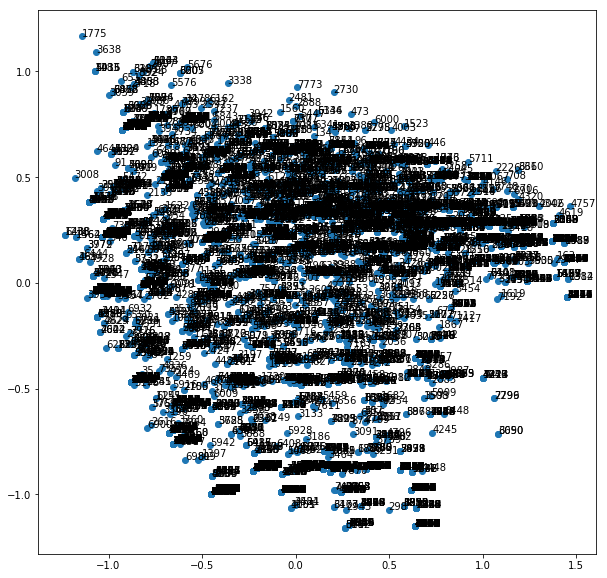

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(mcaFic.fs_r()[:, 0],mcaFic.fs_r()[:, 1])
for i, j, nom in zip(mcaFic.fs_r()[:, 0],mcaFic.fs_r()[:, 1], dc.index):
       plt.text(i, j, nom)
plt.show()

